In [1]:
import tensorflow as tf
import pandas as pd
import random 
from imutils import paths
from tensorflow.keras.applications import VGG19
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import cv2
import os

print('all library imported')

all library imported


In [2]:
print('Loading data about Image')
pd.set_option('display.max_rows',500)
covid_data = pd.read_csv('metadata.csv')
covid_data.head()

Loading data about Image


,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [3]:
covid_data[['finding','view','modality','survival','age']]

,finding,view,modality,survival,age
0,Pneumonia/Viral/COVID-19,PA,X-ray,Y,65.0
1,Pneumonia/Viral/COVID-19,PA,X-ray,Y,65.0
2,Pneumonia/Viral/COVID-19,PA,X-ray,Y,65.0
3,Pneumonia/Viral/COVID-19,PA,X-ray,Y,65.0
4,Pneumonia/Viral/COVID-19,PA,X-ray,NaN,52.0
...,...,...,...,...,...
945,Pneumonia,AP,X-ray,NaN,40.0
946,Pneumonia,AP,X-ray,NaN,40.0
947,Pneumonia,PA,X-ray,NaN,26.0
948,Pneumonia,AP,X-ray,NaN,50.0


In [4]:
path_list=list(paths.list_images('images'))
X=[]
Y=[]

for path in path_list:
    y=path.split(os.path.sep)[-2]
    print(y)
    image=cv2.imread(path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(512,512))
    
    X.append(image)
    Y.append(y)
    
X=np.array(X)/255.0
Y=np.array(Y)

print('Number of training images:',len(X))
print('Number of training images:',len(Y))
print(Y)



images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images
images

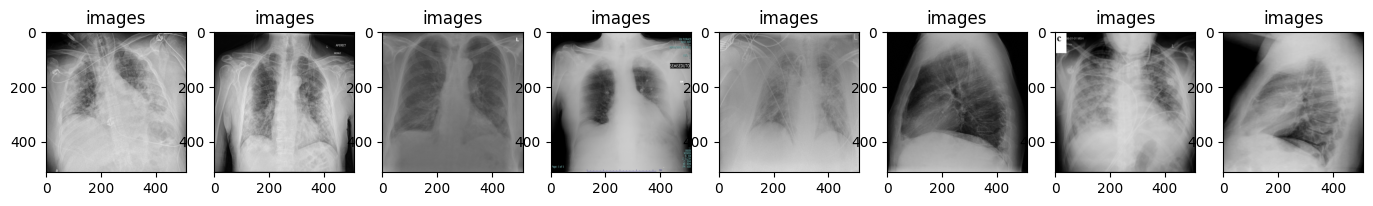

In [5]:
W = 8
L = 1
fig, axes=plt.subplots(L, W , figsize=(17,17))
axes= axes.ravel()
n=394

for i in np.arange(0, W * L):
    index = np.random.randint(0, n)
    axes[i].imshow( X[index])
    axes[i].set_title(Y[index])
    
lb= LabelBinarizer()
Y = lb.fit_transform(Y)
Y = tf.keras.utils.to_categorical(Y)

In [6]:

(X_train, x_test,Y_train, y_test) = train_test_split(X,Y, test_size=0.20, stratify=Y, random_state=2019)

(x_train, x_valid, y_train, y_valid)=train_test_split(X_train,Y_train, test_size=0.20, stratify=Y_train, random_state=2019)

In [7]:
Datagen= tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,rotation_range=20,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

In [10]:
from keras.applications.vgg16 import VGG16
from keras.layers import Input
from tensorflow.keras.layers import Input
def Covid_model():
    input_img = tf.keras.layers.Input(shape=(512,512,3))
    baseModel= VGG16(weights='imagenet',include_top=False,
    input_tensor=tf.keras.layers.Input(shape=(512,512,3)))
    
    for layer in baseModel.layers[:-3]:
        layer.trainable=False
    x=baseModel.output
    x=tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
    x=tf.keras.layers.BatchNormalization(axis=-1)(x)
    x=tf.keras.layers.MaxPooling2D((2,2),padding='same')(x)
    x=tf.keras.layers.Dropout(0.25)(x)
    
    x=tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', padding = 'same')(x)
    x=tf.keras.layers.BatchNormalization(axis=-1)(x)
    
    x=tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(x)
    x=tf.keras.layers.BatchNormalization(axis=-1)(x)
    x=tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    x=tf.keras.layers.Dropout(0.25)(x)
    
    x=tf.keras.layers.Conv2D(128,(3,3), activation='relu',padding='same')(x)
    x=tf.keras.layers.BatchNormalization(axis=-1)(x)
    
    x=tf.keras.layers.Conv2D(128,(3,3), activation='relu',padding='same')(x)
    x=tf.keras.layers.BatchNormalization(axis=-1)(x)
    
    x=tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same')(x)
    x=tf.keras.layers.BatchNormalization(axis=-1)(x)
    x=tf.keras.layers.MaxPooling2D((2,2), padding='same')(x)
    x=tf.keras.layers.Dropout(0.25)(x)
    
    x=tf.keras.layers.Flatten()(x)
    
    x=tf.keras.layers.Flatten()(x)
    x=tf.keras.layers.Dense(256, activation='relu')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Dropout(0.5)(x)
    
    x=tf.keras.layers.Dense(2, activation='softmax')(x)
    
    covid_model=tf.keras.models.Model(baseModel.input, x)
    adagrad=tf.keras.optimizers.Adagrad(lr=0.001)
    covid_model.compile(optimizer=adagrad, loss='binary_crossentropy',metrics=["accuracy"])
    return covid_model

In [ ]:
model = Covid_model()
model.summary()
early_stopping=tf.keras.callbacks.EarlyStopping(
     monitor='val_accuracy',
     verbose=1,
     patience=10,
     mode='max',
     restore_best_weights=True)
covid=model.fit_generator(Datagen.flow(x_train, y_train,batch_size=8),
                         steps_per_epoch=len(x_train) / 8,
                         validation_data=(x_valid, y_valid), epochs=5, callbacks= [early_stopping])

In [16]:
y_pred= model.predict(x_test,batch_size=8)
y_pred=np.argmax(y_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

predicted_metrics= model.evaluate(x_test,y_test,
                                batch_size=8,verbose=0)
for name,value in zip(model.metrics_names, predicted_metrics):
    print(name, ':', value)
print(classification_report(y_pred,y_true,
    target_names=lb.classes_))
cm=confussion_matrix(y_pred, y_true)
total=sum(sum(cm))
acc=(cm[0,0] +cm[1,1])/ total
sensitivity=cm[0,0]/(cm[0,0] + cm[0,1])
specificity=cm[1,1]/(cm[1,0] + cm[1,1])

print("accuracy: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

10/10 [==============================] - 62s 6s/step


ValueError: in user code:

    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1667, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "C:\Users\aviji\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).
